# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
liver_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient.csv')

In [3]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
liver_data.shape

In [ ]:
liver_data.columns

In [ ]:
liver_data.info()

In [ ]:
liver_data.liver_disease.value_counts()

In [ ]:
liver_data.Gender.value_counts()

In [ ]:
liver_data.isnull().sum()

In [10]:
liver_data[liver_data['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [11]:
# Filling missing values
liver_data.Albumin_and_Globulin_Ratio.fillna(liver_data['Albumin_and_Globulin_Ratio'].mean(), inplace = True)

# Data Processing

In [12]:
# Converting Categorical Varables into numberical variable (Gender) using One-Hot Encoding
# One-Hot encoding create new feature with different categories (Gender_Male, Gender_Female)
# pd.get_dummies does the same work as One-Hot encoding in python. 
# Note that you can import One-Hot enconding by the code (from sklearn.preprocessing import OneHotEncoder)
liver_data = pd.get_dummies(liver_data, columns = ['Gender'])

In [13]:
liver_data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [14]:
# Seperating Input Features from Output Features
X = liver_data.drop('liver_disease', axis = 1)
y = liver_data.liver_disease

In [15]:
# Spilling the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101) 

## Building a Model

### Decision Tree Classifier








In [16]:
# Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
DTC = DecisionTreeClassifier(random_state = 1)

In [18]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [19]:
# Predictions
new_X_train = DTC.predict(X_train)
new_prediction = DTC.predict(X_test)

In [20]:
new_prediction

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1])

# Model Evaluation

In [21]:
# Let's evaluate our model using accuracy_score from sklearn
from sklearn.metrics import accuracy_score
print('The training score... {}'.format(accuracy_score(y_train, new_X_train)))
print('The testing score... {}'.format(accuracy_score(y_test, new_prediction)))

The training score... 1.0
The testing score... 0.6068376068376068


In [22]:
from sklearn.tree import export_graphviz
import graphviz

In [23]:
dot_data = export_graphviz(DTC, out_file = None,
                           feature_names = X_test.columns,
                           class_names = ['0', '1'],
                           filled = True, rounded = True,
                           special_characters = True)

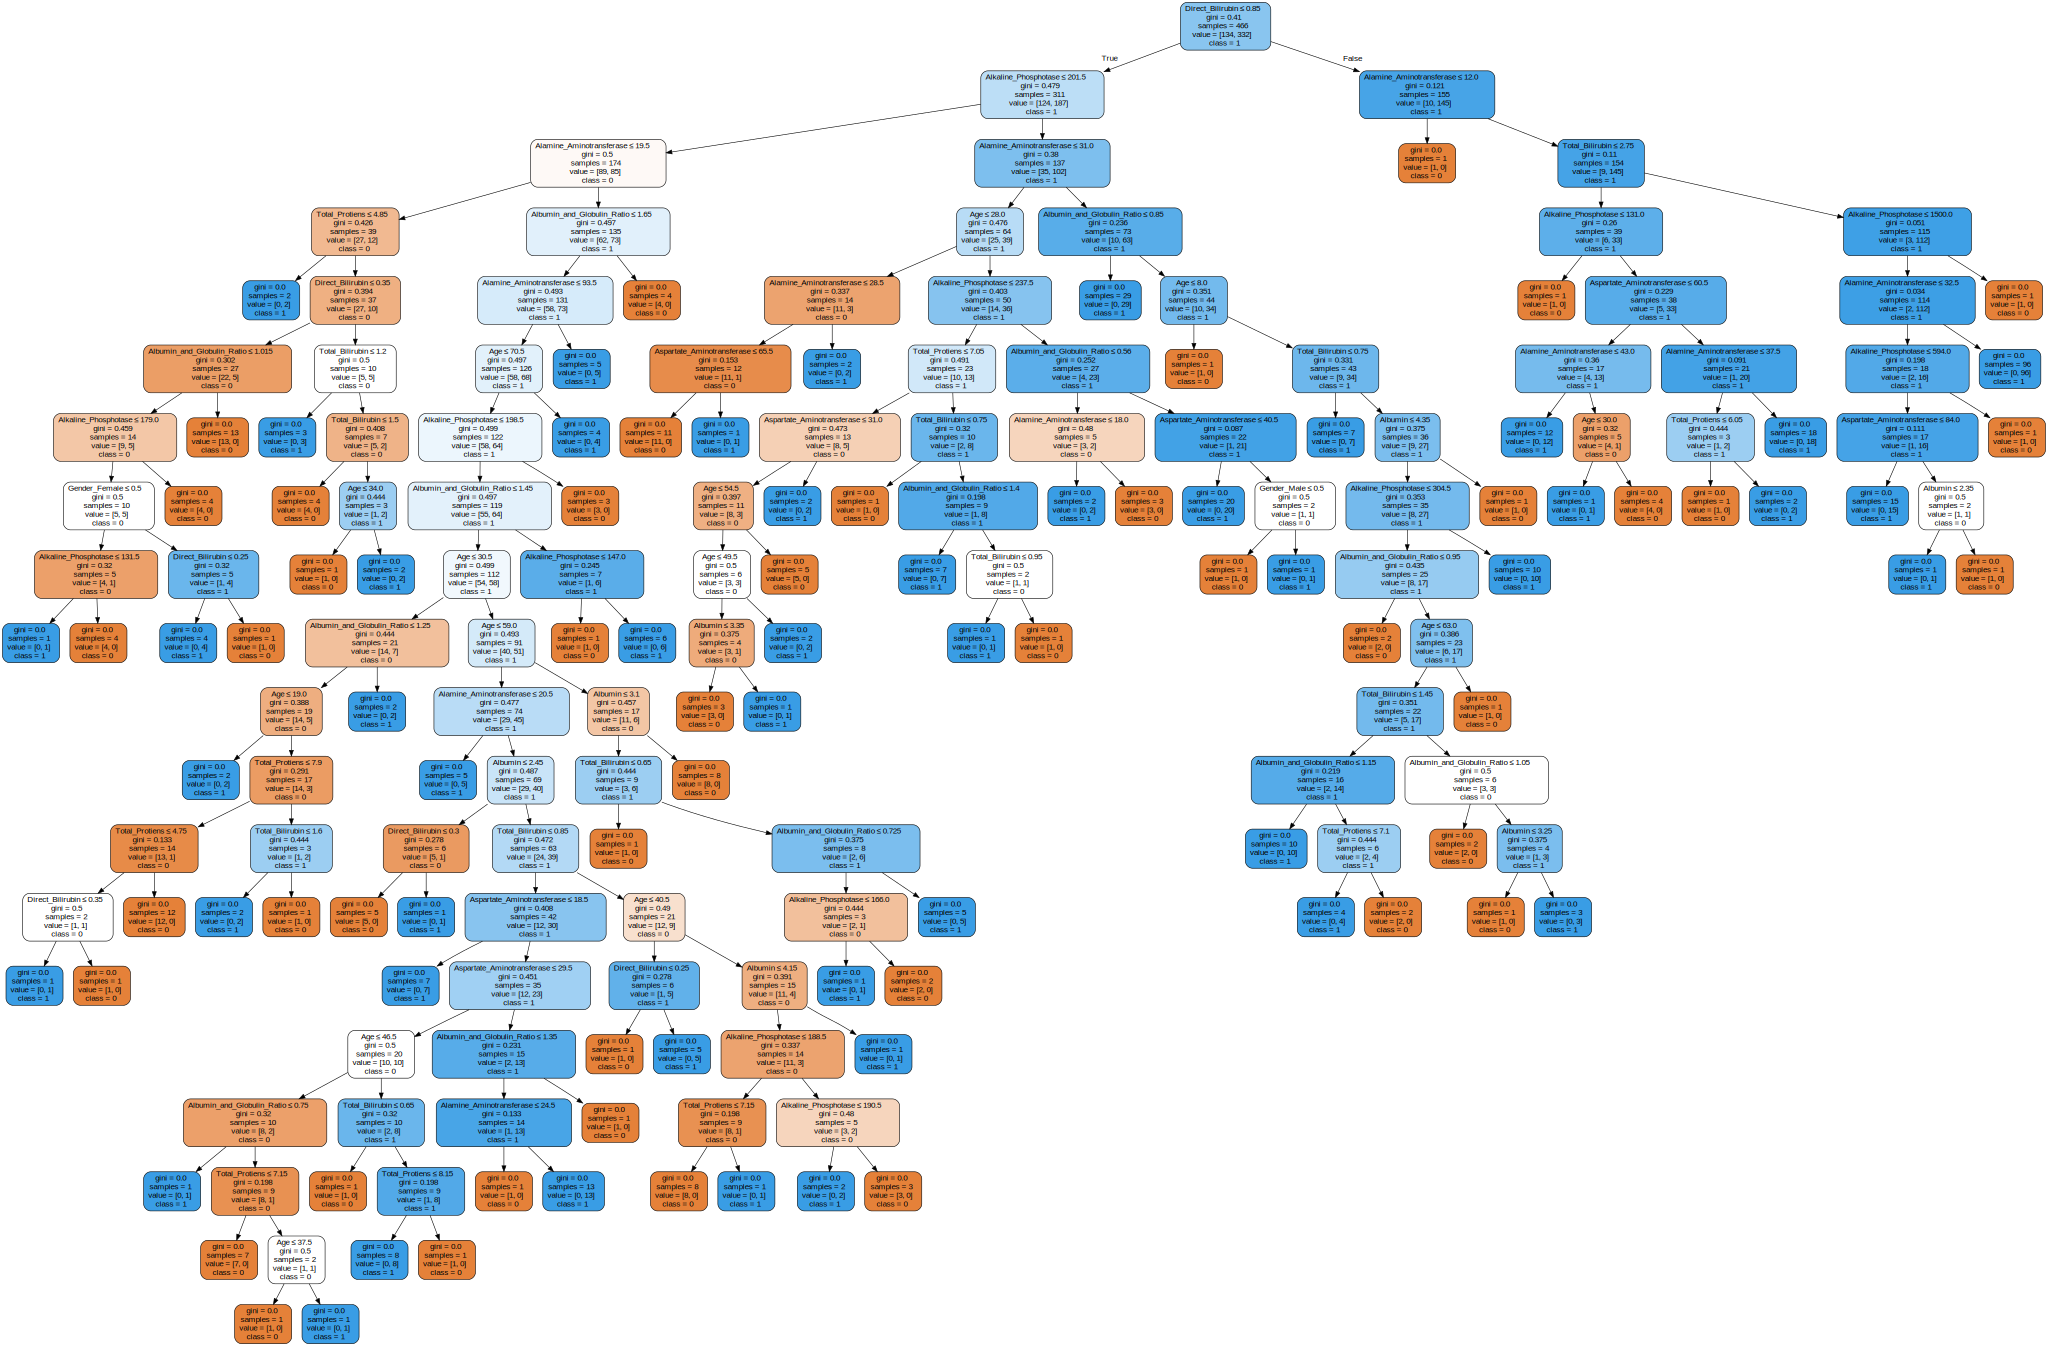

In [24]:
graph1 = graphviz.Source(dot_data)
graph1

In [25]:
# Twerking Parameters to improve model performance (DecisionTreeClassifier)

md = DecisionTreeClassifier(random_state = 1, max_depth = 3)
# Limiting the depth of the tree limit the numbers of questions
md.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [26]:
print('The train score ... {}'.format(accuracy_score(y_train, md.predict(X_train))))
print('The test score .... {}'.format(accuracy_score(y_test, md.predict(X_test))))

The train score ... 0.7467811158798283
The test score .... 0.6752136752136753


In [27]:
dot_data = export_graphviz(md, out_file = None, impurity = False,
                           feature_names = X_test.columns,
                           class_names = ['0', '1'],
                           filled = True, rounded = True,
                           special_characters = True)

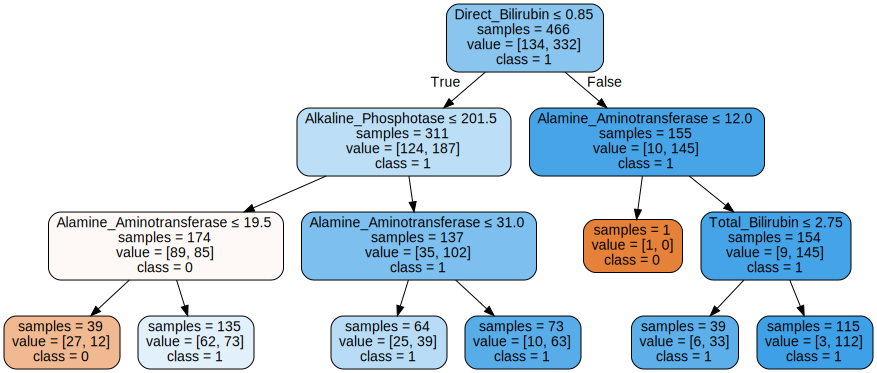

In [28]:
graph2 = graphviz.Source(dot_data)
graph2

### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [32]:
print('The train score ... {}'.format(accuracy_score(y_train, rfc.predict(X_train))))
print('The test score .... {}'.format(accuracy_score(y_test, rfc.predict(X_test))))

The train score ... 1.0
The test score .... 0.6324786324786325


In [33]:
# Twerking Parameters to improve model performance (RandomForestClassifier)
model = RandomForestClassifier(random_state = 1, max_depth = 3)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [34]:
print('The train score ... {}'.format(accuracy_score(y_train, model.predict(X_train))))
print('The test score .... {}'.format(accuracy_score(y_test, model.predict(X_test))))

The train score ... 0.7703862660944206
The test score .... 0.6837606837606838


### Hyperparameter Tunning for Random Forest

In [ ]:
# Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [range(10:110:10)]
bootstrap = ['True', 'False']
max_depth = [range(0:7:1)]
min_samples_leaf = [range(0:5:0.5)]
min_samples_split = [range(0:5:1)]


params = {'n_estimators' = n_estimators,
          'min_features' = min_features,
          'max_depth' = max_depth,
          'min_samples_split' = min_samples_split,
          'min_samples_leaf': min_samples_leaf,
          'bootstrap': bootstrap}

print(params)



{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7], 'min_samples_split': [1, 2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5, 6], 'bootstrap': ['True', 'False']}


### Gradient Boosting Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = 1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [36]:
print('The train score ... {}'.format(accuracy_score(y_train, gbc.predict(X_train))))
print('The test score .... {}'.format(accuracy_score(y_test, gbc.predict(X_test))))

The train score ... 0.924892703862661
The test score .... 0.6752136752136753


### AdaBoost Classifier 

In [38]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state = 1, n_estimators = 30)
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=30, random_state=1)

In [39]:
print('The train score ... {}'.format(accuracy_score(y_train, abc.predict(X_train))))
print('The test score .... {}'.format(accuracy_score(y_test, abc.predict(X_test))))

The train score ... 0.8133047210300429
The test score .... 0.6666666666666666


### kNearest Neigbors Classifier


In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [41]:
print('The train score ... {}'.format(accuracy_score(y_train, knn.predict(X_train))))
print('The test score .... {}'.format(accuracy_score(y_test, knn.predict(X_test))))

The train score ... 0.8283261802575107
The test score .... 0.6581196581196581


In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [43]:
print('The train score ... {}'.format(accuracy_score(y_train, bagging.predict(X_train))))
print('The test score .... {}'.format(accuracy_score(y_test, bagging.predict(X_test))))

The train score ... 0.776824034334764
The test score .... 0.6837606837606838
